<a href="https://colab.research.google.com/github/Belac44/Deep-Learning/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("creditcard.csv")
df.shape

(118921, 31)

In [45]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101105 entries, 0 to 101104
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    101105 non-null  int64  
 1   V1      101105 non-null  float64
 2   V2      101105 non-null  float64
 3   V3      101105 non-null  float64
 4   V4      101105 non-null  float64
 5   V5      101105 non-null  float64
 6   V6      101105 non-null  float64
 7   V7      101105 non-null  float64
 8   V8      101105 non-null  float64
 9   V9      101105 non-null  float64
 10  V10     101105 non-null  float64
 11  V11     101105 non-null  float64
 12  V12     101105 non-null  float64
 13  V13     101105 non-null  float64
 14  V14     101105 non-null  float64
 15  V15     101105 non-null  float64
 16  V16     101105 non-null  float64
 17  V17     101105 non-null  float64
 18  V18     101105 non-null  float64
 19  V19     101105 non-null  float64
 20  V20     101105 non-null  float64
 21  V21     10

In [47]:
df = df.dropna()

In [48]:
df.isnull().sum().any()

False

In [49]:
df['Class'].value_counts()

0.0    100880
1.0       224
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


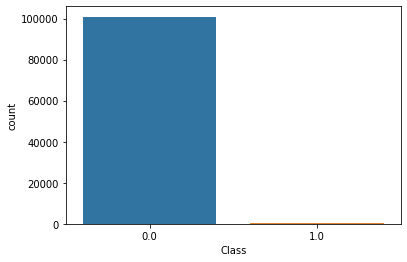

In [50]:
sns.countplot(df["Class"])

In [51]:
X = df.drop(columns="Class")
y = df["Class"]

In [52]:
X.shape

(101104, 30)

In [53]:
y.shape

(101104,)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=17)

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
smt = SMOTE(sampling_strategy=0.7)

X_train, y_train = smt.fit_resample(X_train, y_train)
X_train.shape, y_train.shape

((128622, 30), (128622,))

In [57]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [58]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
from sklearn.metrics import accuracy_score, f1_score
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9994065516695679

In [60]:
f1_score(y_pred, y_test)

0.8648648648648648